## U shape PHP dynamics
## linearized analytical solution and calculation


We solve the governing equation: (Zhang et al., 2002)

## $\frac{\mathrm{d}^{2} X_{p}}{\mathrm{d} \tau^{2}}+32 \frac{\mathrm{d} X_{p}}{\mathrm{d} \tau}+\omega_{0}^{2} X_{p}=\wp\left(\left(\frac{M_{1}}{1+X_{p}}\right)^{\gamma}-\left(\frac{M_{2}}{1-X_{p}}\right)^{\gamma}\right)$


By turning off the mass tranfer due to heat tranfer, $M_1$ and $M_2$ are considered as constants.

Let us linearize the RHS of this equation

## $\frac{\mathrm{d}^{2} X_{p}}{\mathrm{d} \tau^{2}}+32 \frac{\mathrm{d} X_{p}}{\mathrm{d} \tau}+\omega_{0}^{2} X_{p}= [\wp M_{1}^{\gamma} (-\gamma) \left({1+X_{p}(0)}\right)^{-\gamma-1} -(-1) \wp M_{2}^{\gamma} (-\gamma) \left({1-X_{p}(0)}\right)^{-\gamma-1}] X_{p}$

It is like spring mass system with damping:

## $A \frac{\mathrm{d}^{2} X_{p}}{\mathrm{d} \tau^{2}}+B \frac{\mathrm{d} X_{p}}{\mathrm{d} \tau}+C X_{p}= 0$

A, B and C are three constants.

The solution of $X_P$ is :

## $X_p = \mathrm{c_1} \mathrm{e}^{\mathrm{f_1} \tau} + \mathrm{c_2} \mathrm{e}^{\mathrm{f_2} \tau}$

$f_1$ and $f_2$ are the roots of the quadratic equation $A f^2 + B f + C = 0$

$c_1$ and $c_2$ are determined by the initial conditions of $X_p$ and $\frac{\mathrm{d} X_{p}}{\mathrm{d} \tau}$. In massspringsys(), we solve the linear equation

## \begin{gather}
\begin{bmatrix}
1 & 1 \\
f_1 & f_1
\end{bmatrix}
\begin{bmatrix}
c_1 \\
c_2 
\end{bmatrix}
=
\begin{bmatrix}
X_p(0) \\
\frac{\mathrm{d} X_{p}}{\mathrm{d} \tau}(0)
\end{bmatrix}
\end{gather}

to get $c_1$ and $c_2$

In [1]:
using Plots
pyplot()

Plots.PyPlotBackend()

In [2]:
using NLsolve

In [3]:
using DifferentialEquations

In [4]:
function quadsolu(A,B,C) 
    
    # find the solution of the quadratic equation

    solu = complex(zeros(2))
    
    solu[1] = (-B + sqrt(Complex(B^2 - 4*A*C))) /(2*A)
    solu[2] = (-B - sqrt(Complex(B^2 - 4*A*C))) /(2*A)
    
    return solu
end

quadsolu (generic function with 1 method)

In [5]:
function massspringsys(A::Float64,B::Float64,C::Float64,X0::Float64,dXdt0::Float64,t) 
    
    # find the solution of the linear spring mass system with damping
    (f1,f2) = quadsolu(A,B,C)
    
    M = [1 1; f1 f2]

    (c1,c2) = M\[X0;dXdt0]
    
    X = c1.*exp.(f1.*t) + c2.*exp.(f2.*t)
    
    return X
end

massspringsys (generic function with 1 method)

## Initialization

In [6]:
t = collect(Float64, 0:0.00001:0.1)

X0 = 0.01 #0.1 will make it more nonlinear for the numerical results!
dXdt0 = 0.0

M1 = 1.0;
M2 = 1.0;

P = zeros(2);
θ = zeros(2);

ω0 = sqrt(1.2e004);
℘ = 1.2e005;

γ = 1.30

A = 1.0
B = 32.0
C = ω0^2 - ( ℘*M1^γ * (-γ) * (1+X0)^(-γ-1) - (-1) * ℘*M2^γ * (-γ) * (1-X0)^(-γ-1))

324118.42649034073

## Get analytical solution

In [7]:
X = massspringsys(A::Float64,B::Float64,C::Float64,X0::Float64,dXdt0::Float64,t)

10001-element Array{Complex{Float64},1}:
  0.010000000000000002 + 2.710505431213761e-20im 
  0.009999837958509353 + 4.0657581468206416e-20im
   0.00999935190841712 + 2.710505431213761e-20im 
  0.009998541969140684 + 4.0657581468206416e-20im
  0.009997408270555359 + 5.421010862427522e-20im 
  0.009995950952986825 + 2.710505431213761e-20im 
  0.009994170167203255 + 5.421010862427522e-20im 
  0.009992066074407079 + 8.131516293641283e-20im 
  0.009989638846226421 + 5.421010862427522e-20im 
  0.009986888664706196 + 8.131516293641283e-20im 
  0.009983815722298887 + 8.131516293641283e-20im 
  0.009980420221854986 + 8.131516293641283e-20im 
  0.009976702376613068 + 8.131516293641283e-20im 
                       ⋮                         
 0.0019502675968587923 + 5.421010862427522e-20im 
 0.0019468583728203457 + 5.421010862427522e-20im 
  0.001943387148557352 + 5.421010862427522e-20im 
 0.0019398540563971807 + 5.421010862427522e-20im 
 0.0019362592306297799 + 5.421010862427522e-20im 
 0.001932

## Get numerical solution

In [8]:
    p = (γ,ω0,℘);

function php!(du,u,p,t)
    
    γ,ω0,℘  = p
    
    P[1] = (u[3]/(1+u[1]))^(γ) 
    P[2] = (u[4]/(1-u[1]))^(γ) 
#    θ[1] = P[1]^((γ-1)/γ)
#    θ[2] = P[2]^((γ-1)/γ)
    
    du[1] = u[2]
    du[2] = -32*u[2] - (ω0^2)*u[1] + ℘*(P[1]-P[2])
    du[3] = 0.0
    du[4] = 0.0
#   u[1] > 0 ? du[3] = -Hc*u[1]*(θ[1] - θc) : du[3] = He*(1 + u[1])*(θe - θ[1]) 
#   u[1] > 0 ? du[4] = He*(1-u[1])*(θe - θ[2]) : du[4] = Hc*u[1]*(θ[2] - θc)
    
    return du
end

php! (generic function with 1 method)

In [9]:
u0 =  [X0,dXdt0,M1,M2]
tspan = (0.0, 0.1);
prob = ODEProblem(php!, u0, tspan, p)
sol = solve(prob, RK4(), adaptive=false, dt=1.0e-5);

In [10]:
Xhist=zeros(length(sol));
M1hist=zeros(length(sol));
M2hist=zeros(length(sol));
thist=zeros(length(sol));

for i = 1:length(sol)
    Xhist[i]=sol[i][1]
    M1hist[i]=sol[i][3]
    M2hist[i]=sol[i][4]
    thist[i]=sol.t[i]
end

## Compare the two results

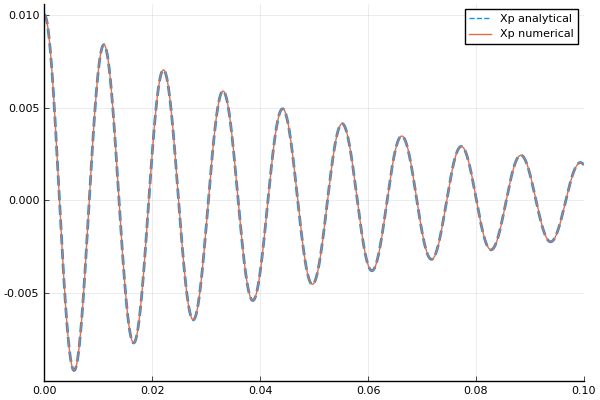

In [11]:

plot(thist[1:end-1],real(X), xlim=(0.0,0.1), linestyle = :dash, linewidth=2.0, label="Xp analytical")
plot!(thist,Xhist, label="Xp numerical")

## When $X_0 = 0.1$, the error will be more evident as the dynamics from the numerical results become more nonlinear.  It is not shown below but you can set X0 = 0.1 to see it.